# 개념

한국에서는 웹 크롤링이라 하고, 해외에서는 웹 스크롤링이라고 함.  
둘은 다른 의미이다.   

https://blog.codef.io/crawling_vs_scraping/  

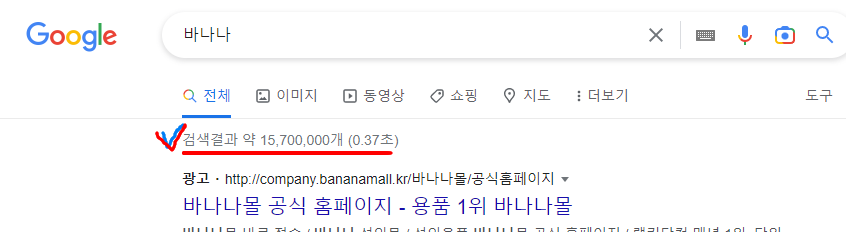

1500만개를 넘는 페이지를 0.37초만에 찾았다. 이게 가능한 일인가?  
사실은, 사용자가 검색하지 않더라도 구글의 가상 웹 브라우저 봇이, 여러 키워드로 웹사이트들을 찾아다니고 있다.  

이것이 바로 웹 크롤링이다.  
웹 크롤링은 여러 페이지를 돌아다니면서 정보를 모으는 것을 의미하며,  
웹 스크래핑은 한 페이지의 정보를 모으는 것을 의미한다.  

* Beautiful Soup은 '스크래핑' 기술이다.  
왜 soup일까? html로 범벅이 된 코드는 이것저것이 뒤섞인 soup같다고 했다고 한다.  
그래서 이 soup에서 아름답게 작업하는 방법이다 해서 Beautiful Soup이라고 한다.

* 비슷한 것으로, 스프링과 스프링부트  
기존 복잡하던 java의 개발 방법을 

In [ ]:
from bs4 import BeautifulSoup